# Microprosessor trends in Jupyter lab to illustrate the stagnation of traditional transistors

## Original image from Karl Rupp

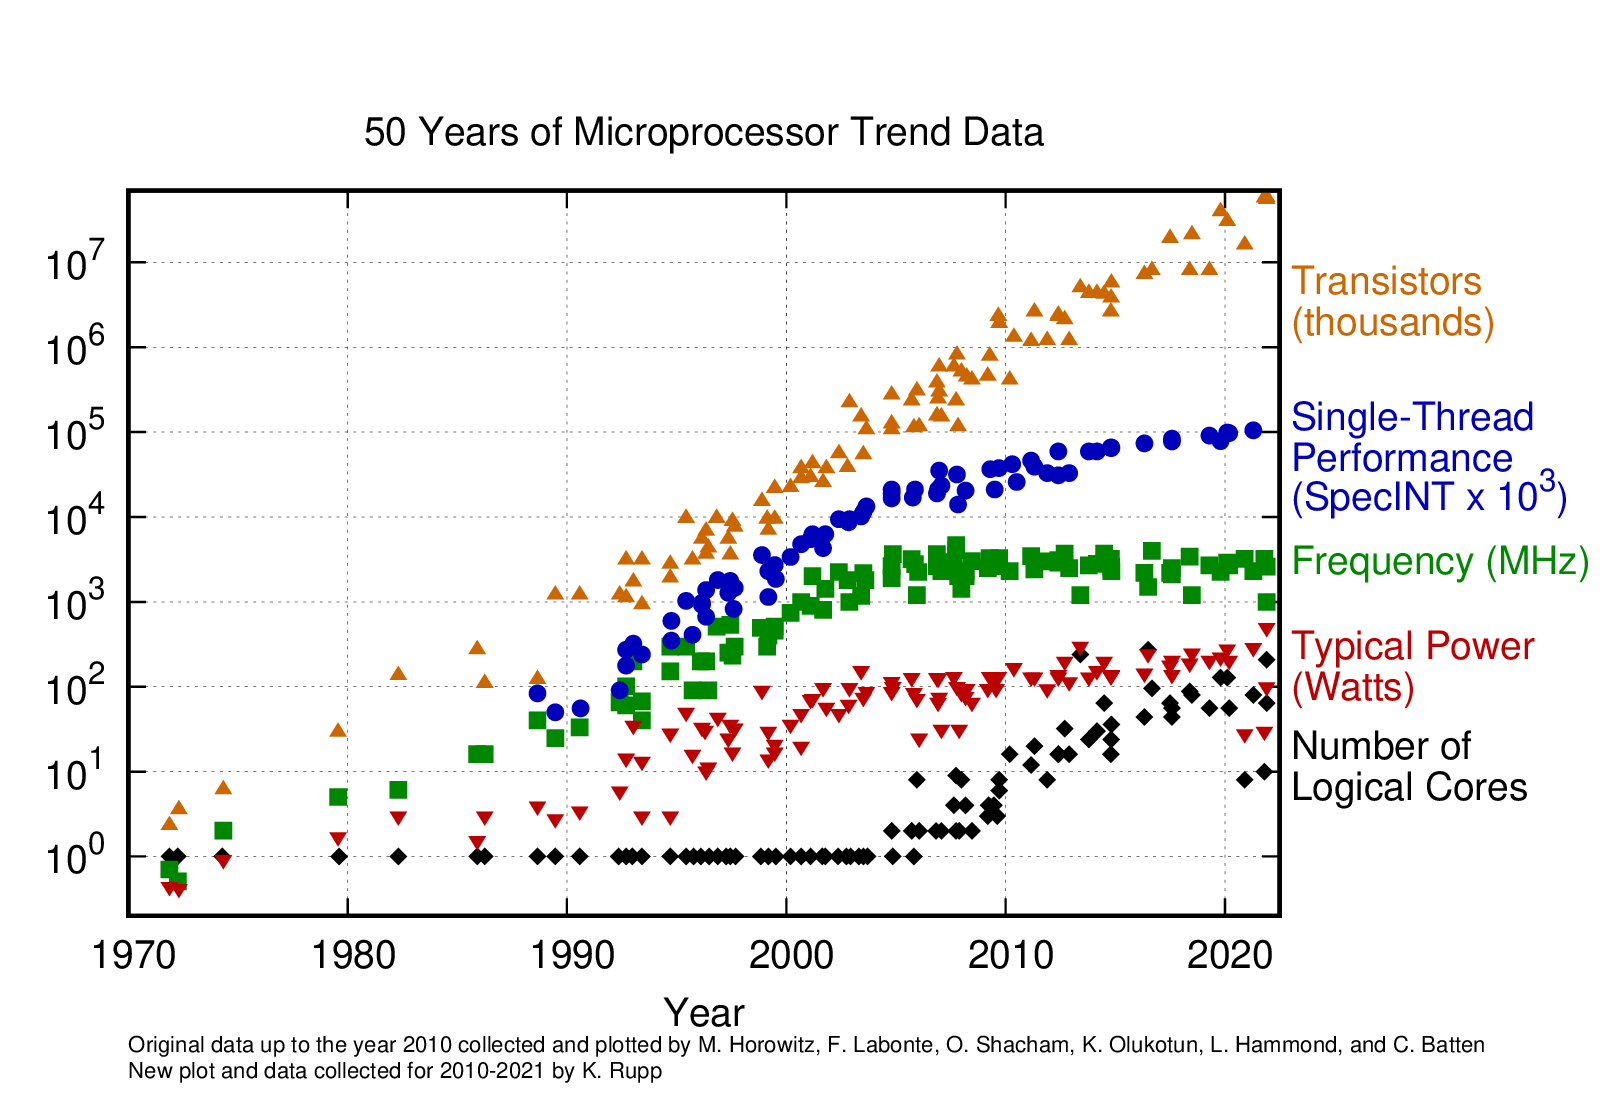

In [1]:
from IPython.display import Image
Image(filename='50yrs/50-years-processor-trend.png') 

## Goal

### Make the plot more visually appealing, so that the general public can understand better the challenge of traditional computer chips. 

## The target group is thus people in the general public with some curiosty about computers performance.

This notebook is my final product, which is avaliable at GitHub for anyone who wants to use these figures. The repo is a fork of Karl Rupps repo.

https://github.com/brynjarmorka/microprocessor-trend-data/

https://github.com/karlrupp/microprocessor-trend-data

## Short background

Many have heard about the so called "Moore's law": the observation that the number of transistors in a dense integrated circuit doubles about every two years. Transistors is the building block of computers, and more transistors allow for more computations which is the same as faster computers. Todays top modern transistors have reached a size of tens of nanometers, which is not far from the size of single atoms at around 0.1 nanometers. This is obviously a hard physical barrier for smaller transistors, but already at 2010 the frequency of modern computer chips stagnated.

The stagnation around 2010 of the frequency is due to the maximum possible power input. Even though smaller transistors were developed, it became impossible to utilize all the transistors on the chip at the same time because every transistor require some power and more power into the chip would litteraly melt the compounds of the chip. The performance increase of the moders computer chips was thus not due to higher frequencies of the chips, but due to the new invention of using multiple cores. Multiple cores allow the chip to do computations simultanious, essentially allowing faster computers still, even though we have already hit a limit for frequency of the singe operating chips.

The problem is that these traditional type of chips with transistors are getting closer and closer to a limit where they really cannot become any faster, and thus we would need some alternative way of making computer chips. An exciting and promising area is the use of neuromorphic solutions, which is any very large-scale system of integrated circuits that mimic neurobiological architectures present in the nervous system. That is a story for another time (or you can read the poster called  "Neuromorphic_systems_poster.pdf".

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
# load in data into numpy arrays
trans = np.loadtxt('50yrs/transistors.dat')
spec = np.loadtxt('50yrs/specint.dat')
freq = np.loadtxt('50yrs/frequency.dat')
watt = np.loadtxt('50yrs/watts.dat')
cores = np.loadtxt('50yrs/cores.dat')
datas = [trans, spec, freq, watt, cores]

In [4]:
def five_year_avg(data):
    data_avg = []
    for period in range(1970, 2025, 5):
        if (data[:,0] < period).sum():
            data_avg.append([period, data[:,1][(data[:,0] > period ) & (data[:,0] < period + 10)].mean()])
    data_avg[-1][0] = 2022  # change last to 2022
    return np.array(data_avg)


data_5yr_avg = [five_year_avg(datas[i]) for i in range(5)]

In [5]:
# define colors and labels/titles
colors = ["#83B3AE", "#F4D8D1","#629BBD","#BC6A6A", "#206490",  "#AE6C6A", "#000000", "#FEF6F4"] # last is background
labels = ["Number of transistors [x1000]", "SpecINT [x1000]", "Frequency of chip [MHz]", "Power use [Watts]", "Number of cores"]

In [6]:
def plot_sub(data, axs, color="blue", marker=".", title=""):
    axs.plot(data[:,0], data[:,1], marker, color=color)
    axs.set_title(title)

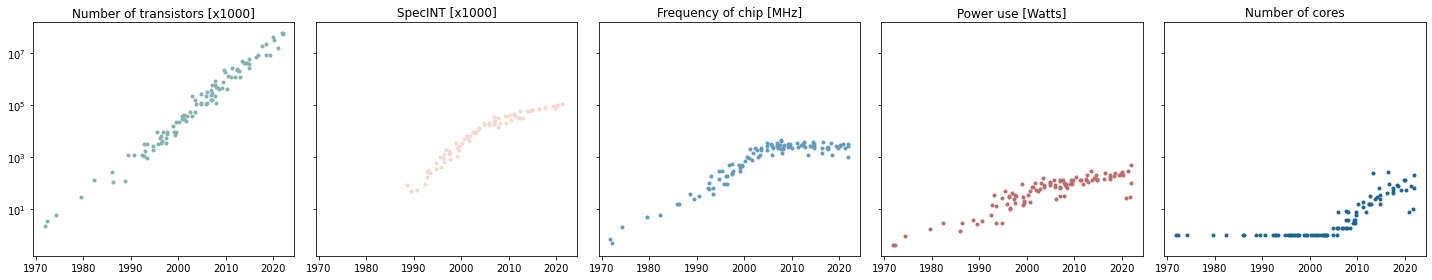

In [7]:
def five_simple_subplots():
    fig, axs = plt.subplots(1,5, sharey=True, sharex=True, figsize=(20,4), tight_layout=True)
    for i in range(5):
        plot_sub(datas[i], axs[i], title=labels[i], color=colors[i])
    plt.yscale("log")
    plt.show()

    
five_simple_subplots()

In [8]:
def plot_same(data, color="black", marker="."):
    plt.plot(data[:,0], data[:,1], marker, color=color)

In [9]:
def my_legend(which=[0,1,2,3,4]):
    patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in which]
    dist_from_x0 = .03
    dist_from_top = .95
    plt.legend(bbox_to_anchor=(dist_from_x0, dist_from_top), loc='upper left', handles=patches)

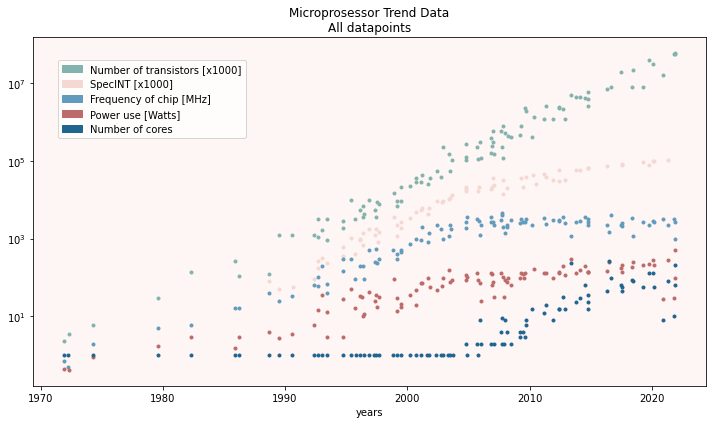

In [10]:
def data_as_points_plot(which=[0,1,2,3,4], figsize=(10,6)):
    fig, ax = plt.subplots(1,1, figsize=figsize, tight_layout=True)
    my_legend(which)
    for i in which:
        plot_same(datas[i], color=colors[i])
    plt.title("Microprosessor Trend Data\nAll datapoints")
    ax.set_facecolor(colors[-1])
    plt.yscale("log")
    plt.xlabel("years")
    plt.show()

    
data_as_points_plot()

# Different figure size makes the flattening look different

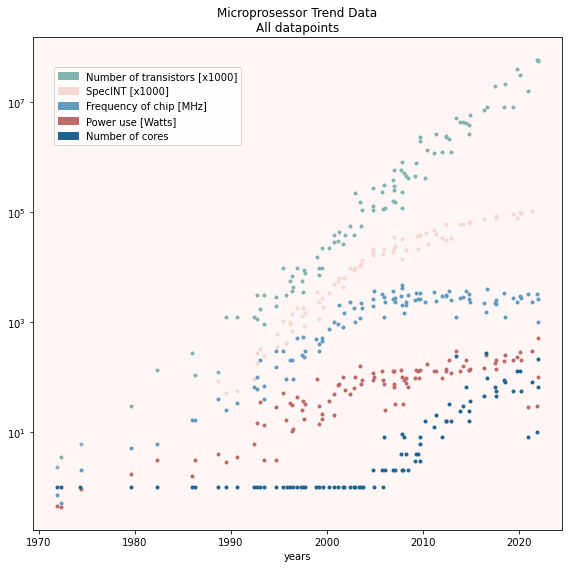

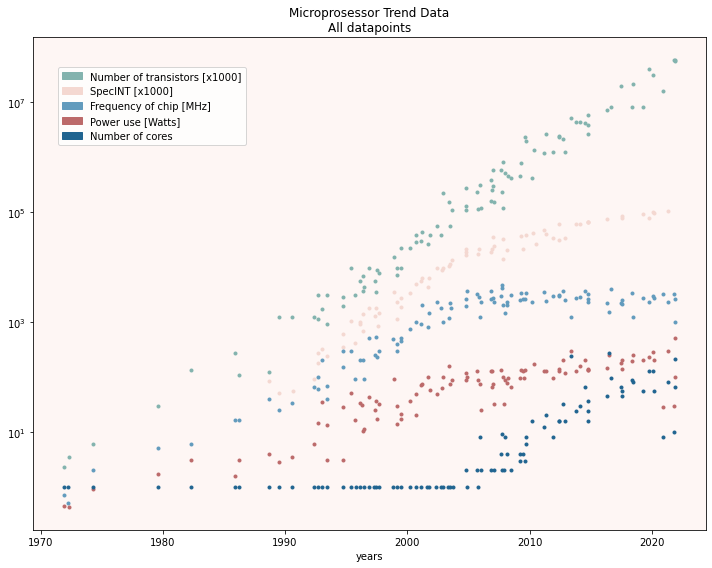

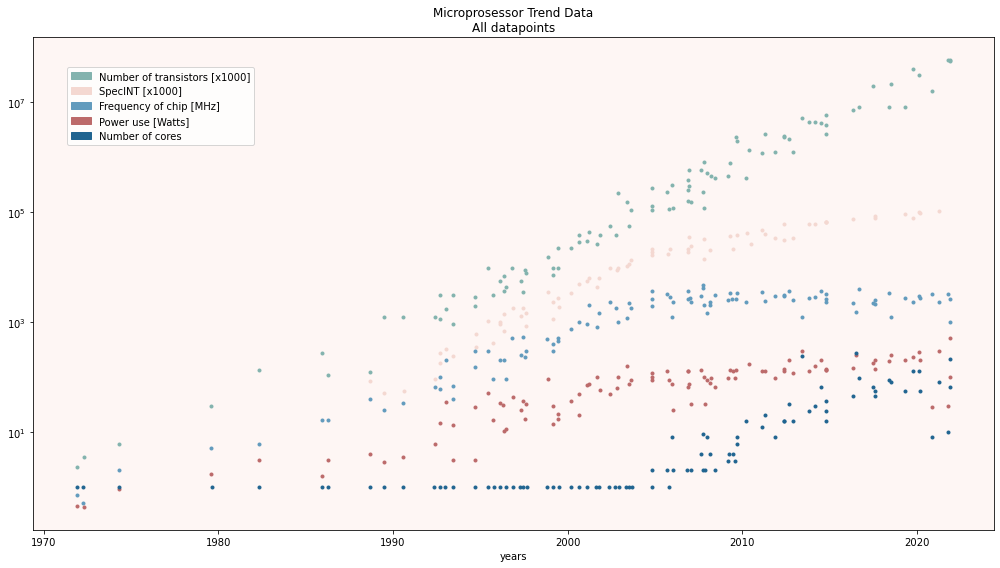

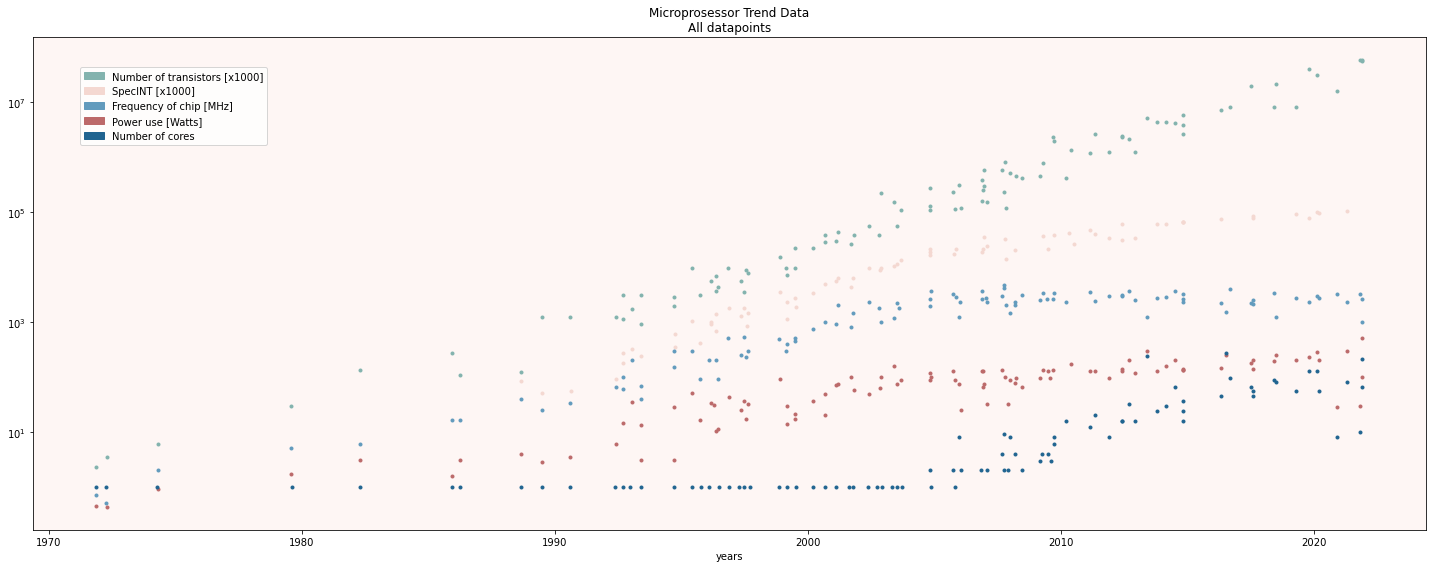

In [11]:
data_as_points_plot(figsize=(8,8))
data_as_points_plot(figsize=(10,8))
data_as_points_plot(figsize=(14,8))
data_as_points_plot(figsize=(20,8))

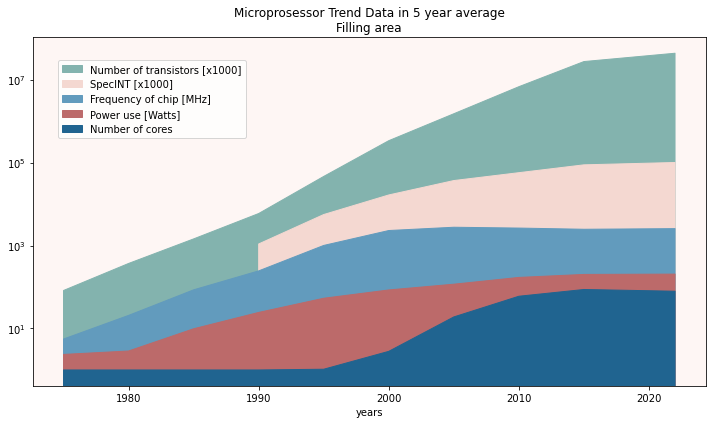

In [12]:
def five_years_avg_filling_plot(which=[0,1,2,3,4], figsize=(10,6), save_name=""):
    fig, ax = plt.subplots(1,1, figsize=figsize, tight_layout=True)
    for i in which:
        plt.fill_between(data_5yr_avg[i][:,0], data_5yr_avg[i][:,1], 0, color=colors[i])
    my_legend(which)
    plt.title("Microprosessor Trend Data in 5 year average\nFilling area")
    ax.set_facecolor(colors[-1])
    plt.yscale("log")
    plt.xlabel("years")
    if save_name:
        plt.savefig(save_name)
    plt.show()
    

five_years_avg_filling_plot()

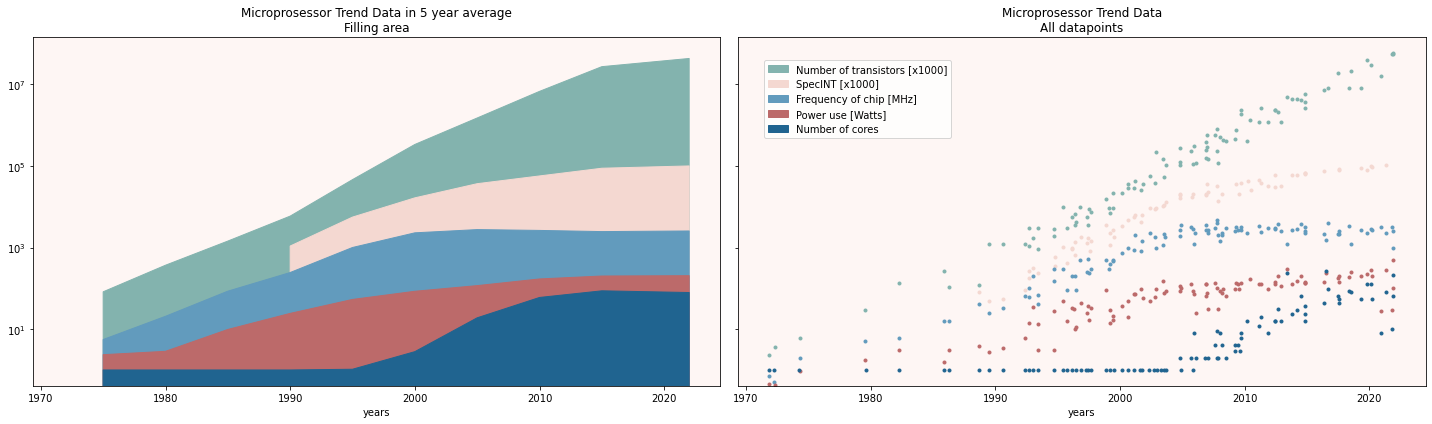

In [13]:
def points_and_fill_line_plot(which=[0,1,2,3,4], figsize=(20,6)):
    fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=figsize, tight_layout=True)
    
    # Filled lines
    for i in which:
        axs[0].fill_between(data_5yr_avg[i][:,0], data_5yr_avg[i][:,1], 0, color=colors[i])
    axs[0].set_title("Microprosessor Trend Data in 5 year average\nFilling area")
    axs[0].set_facecolor(colors[-1])
    axs[0].set_yscale("log")
    axs[0].set_xlabel("years")
    
    # Points
    for i in which:
        plot_same(datas[i], color=colors[i])
    axs[1].set_title("Microprosessor Trend Data\nAll datapoints")
    axs[1].set_facecolor(colors[-1])
    axs[1].set_yscale("log")
    axs[1].set_xlabel("years")
    
    # Label
    patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in which]
    dist_from_x0 = .03
    dist_from_top = .95
    plt.legend(bbox_to_anchor=(dist_from_x0, dist_from_top), loc='upper left', handles=patches)

    
points_and_fill_line_plot()

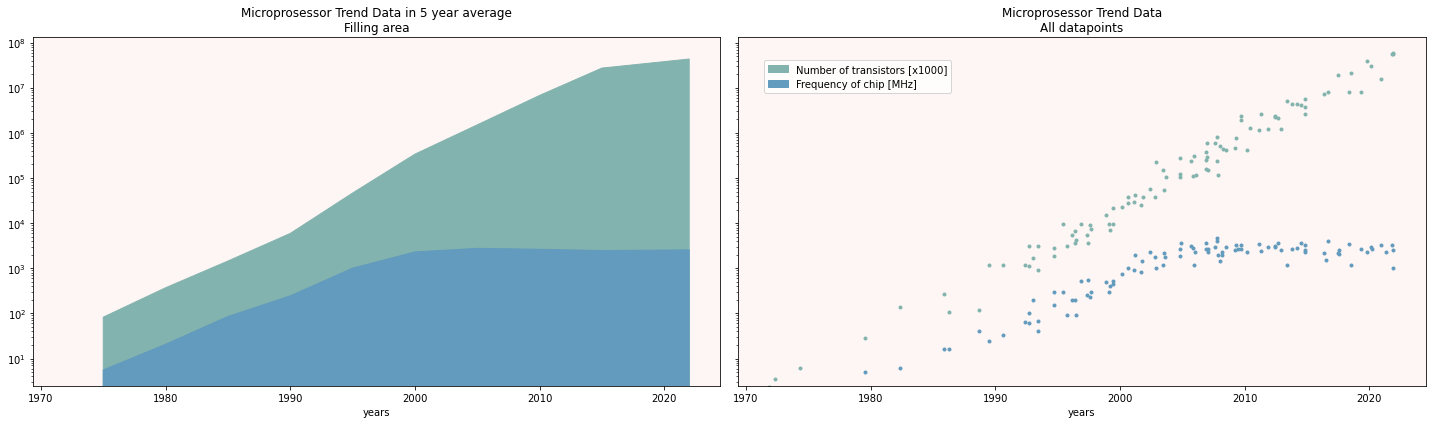

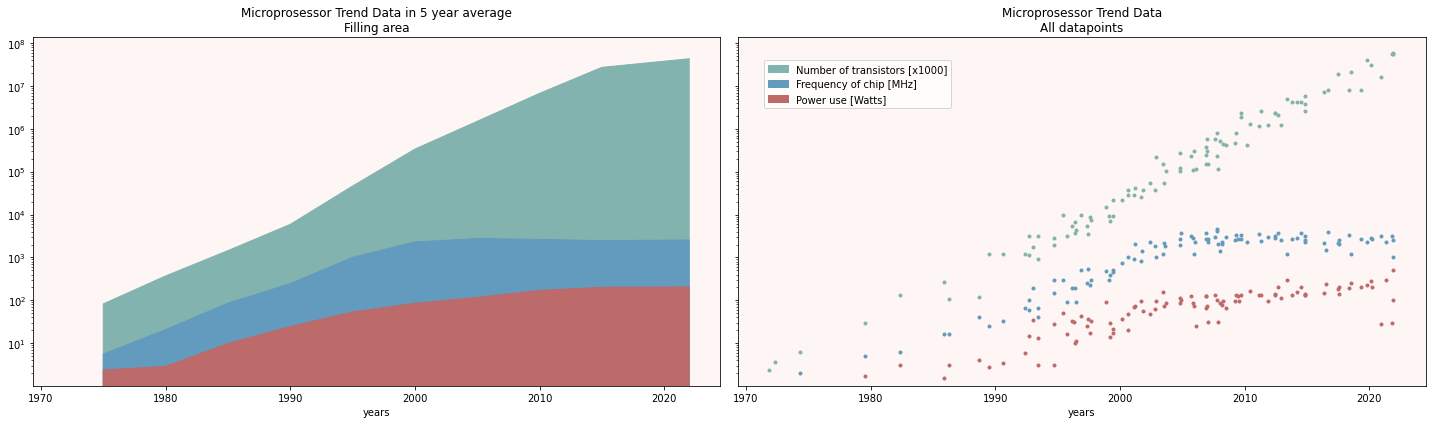

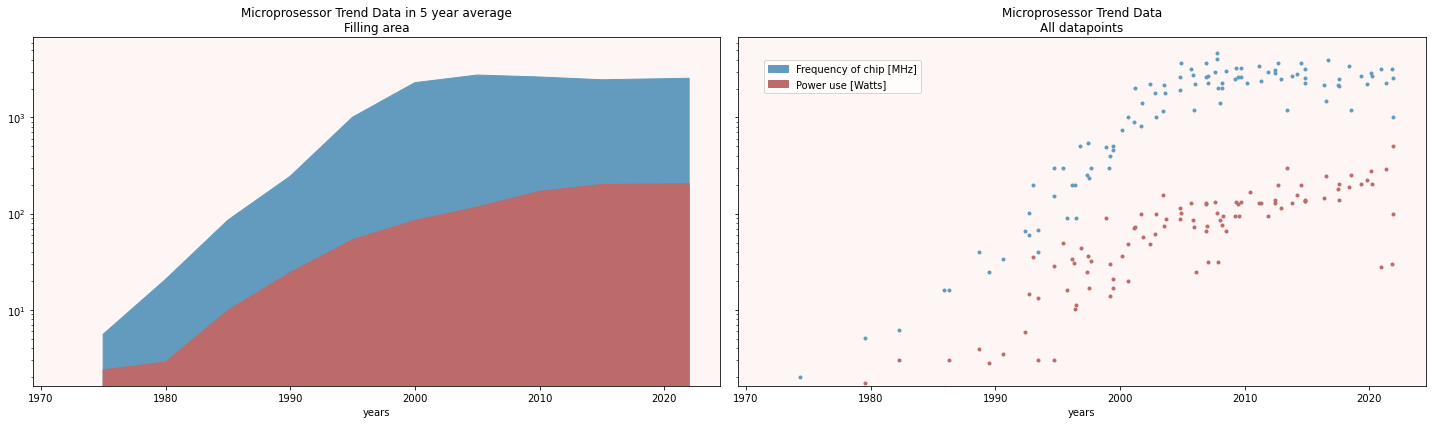

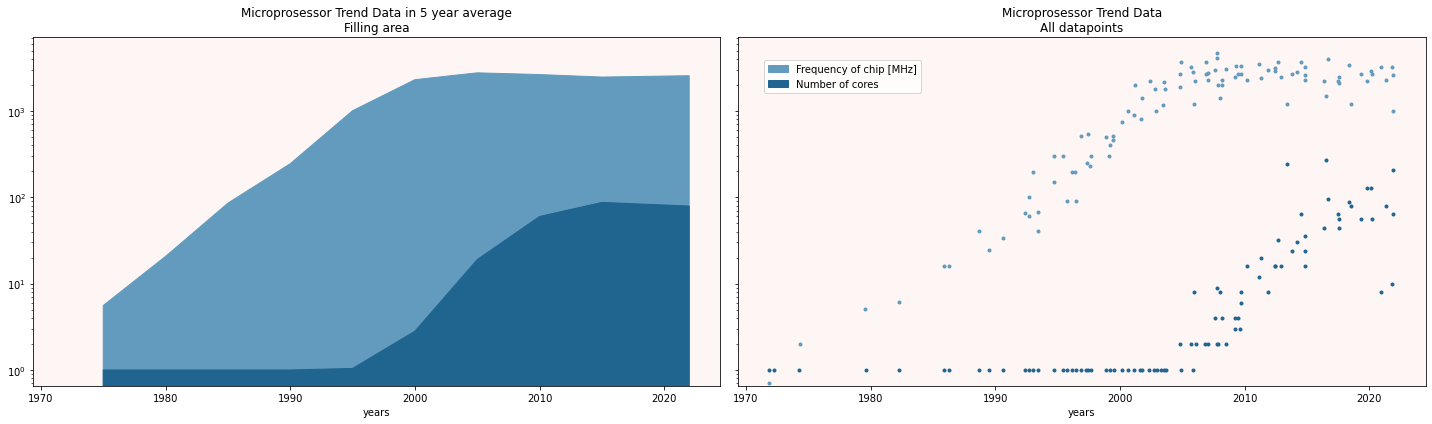

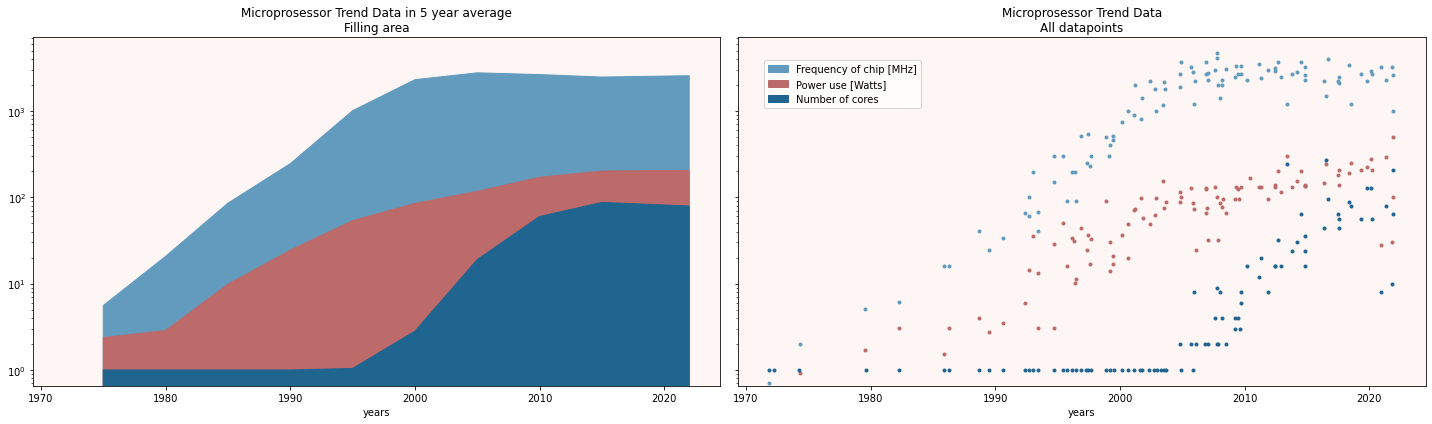

In [14]:
points_and_fill_line_plot([0, 2])
points_and_fill_line_plot([0, 2, 3])
points_and_fill_line_plot([2, 3])
points_and_fill_line_plot([2, 4])
points_and_fill_line_plot([2, 3, 4])

#### The center of the problem is not really the number of transistors, but rather the flattening. The last plot with frequency, power use and cores is illustrating the stagnation of computer chips.

#### Also, the 5 year average is easier to read for an average person. Thus I focus on that further. The dots give an unnecessary information overload and does not show the trend as well as the filled lines.

## I noticed how different the flattening of the curve looks with different apects ratio:

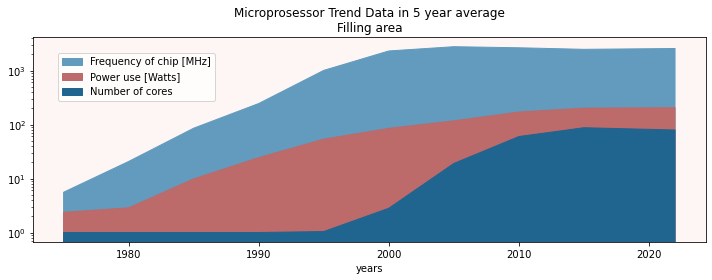

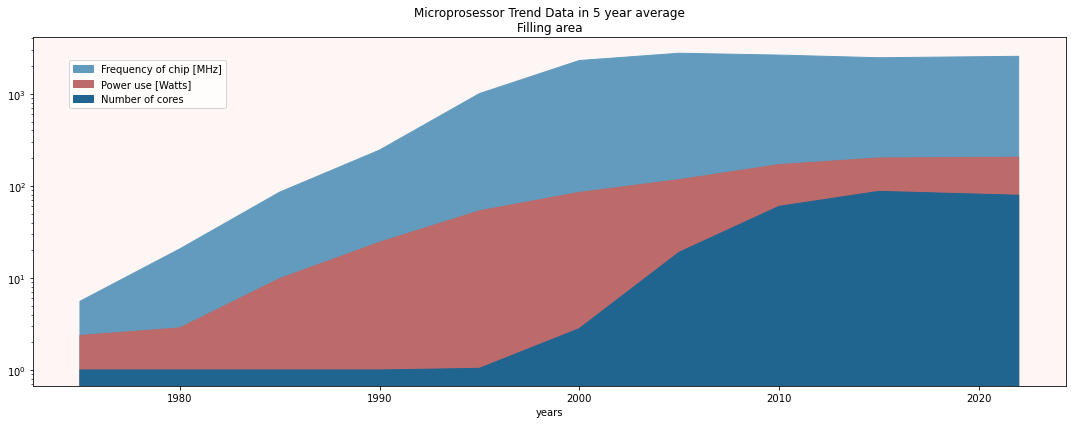

Above in the bigger format it is easier to see the flattening than in the first, even though the aspect ratio is equal.


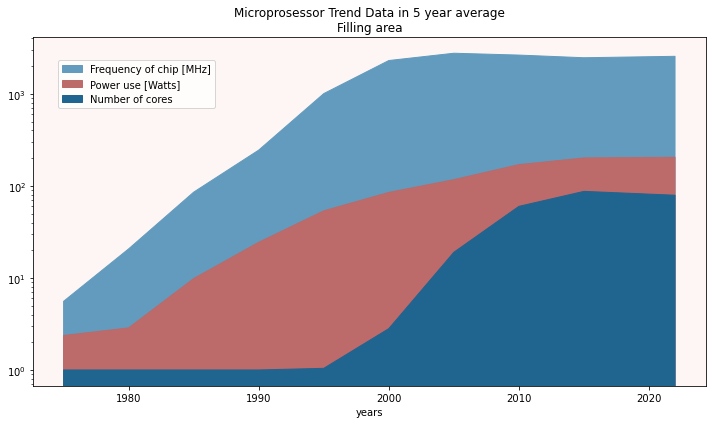

Above the increase is steeper and thus the flattening feels faster and more significant.


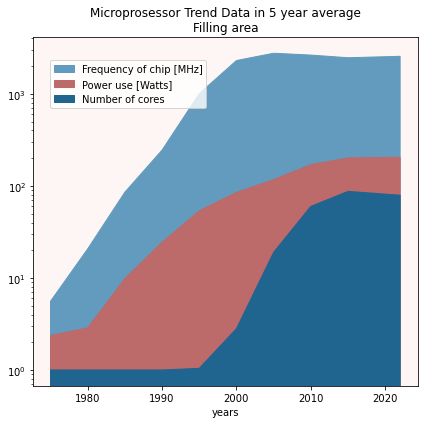

Above in a box shape it just looks off.


In [15]:
five_years_avg_filling_plot([2, 3, 4], figsize=(10,4))
five_years_avg_filling_plot([2, 3, 4], figsize=(15,6))
print('Above in the bigger format it is easier to see the flattening than in the first, even though the aspect ratio is equal.')
five_years_avg_filling_plot([2, 3, 4], figsize=(10,6))
print('Above the increase is steeper and thus the flattening feels faster and more significant.')
five_years_avg_filling_plot([2, 3, 4], figsize=(6,6))
print('Above in a box shape it just looks off.')


### I do like the aspect ratio below the best for illustrating the problem of the flattening.

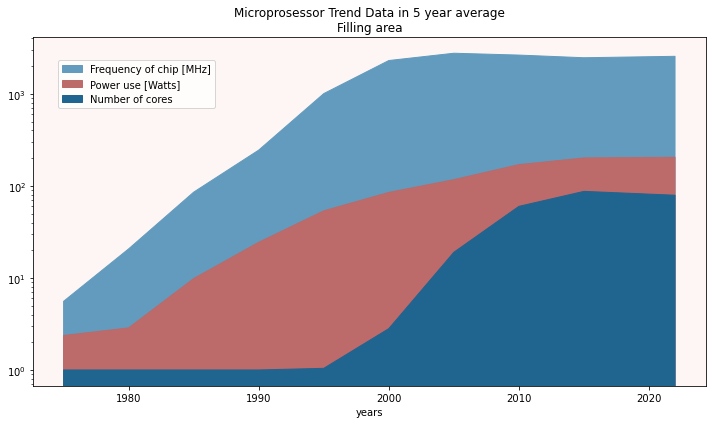

In [16]:
five_years_avg_filling_plot([2, 3, 4], figsize=(10,6))

### Since people ususally have heard of the transistors and "Moore's law", it would probably be nice to also give a plot of the transistors.

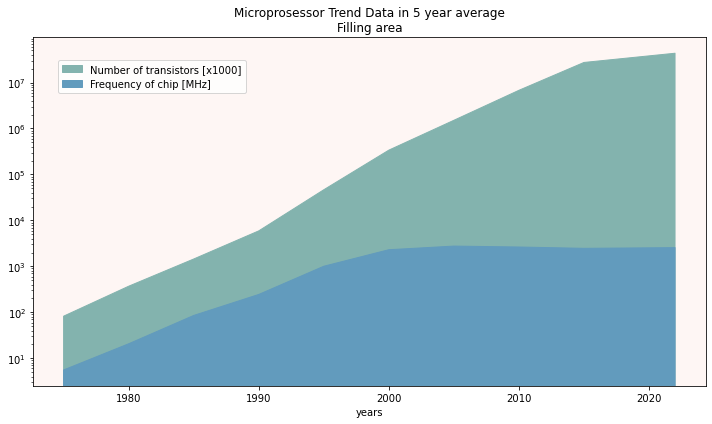

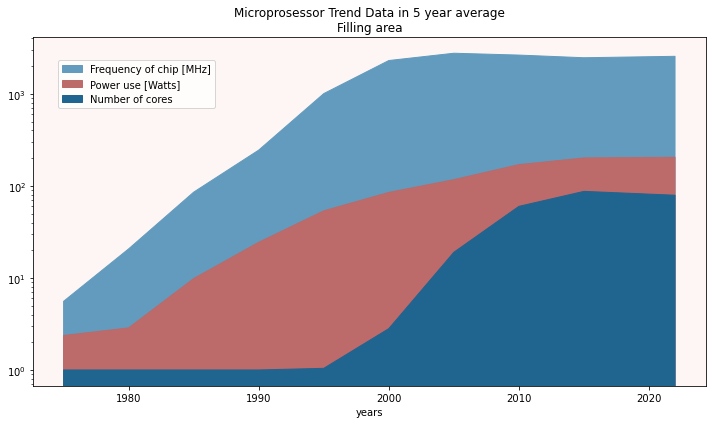

In [17]:
five_years_avg_filling_plot([0,2], figsize=(10,6), save_name="Trans+freq_5yr_avg_fillplot.png")
five_years_avg_filling_plot([2, 3, 4], figsize=(10,6), save_name="Freq+power+cores_5yr_avg_fillplot.png")

### I do like two separate plots best, where I use frequency in both. Doing this illustrates the continued increase of transistors and the flattening quite well.
### This would not have been accepltable in a scientific paper I guess, since it is the same data twice, but it is nice to have it for scale here. 
### Again, the target group is people in the general public with some curiosty about computers performance.

Cores are included to explain easier the continued performance enhancment.

# Conclusion: The two plots above solve my issue quite well, I would say.

Additional explaination from Quora, https://www.quora.com/How-do-computer-chips-get-faster


Why has computer chip speed not continued to increase?
They have, in that they have got more powerful.

What hasn’t increased is clock frequency.

The problem is power, and in particular, heat dissipation.

You see, Moore’s Law predicted that, every two years (or 1.5 years, or year, depending on which version you choose), the density of transistors on a chip would double. It has held remarkably accurately for decades.

As a nice side-effect, every time transistors got smaller, they also got faster. This allowed us to take a circuit from two years ago, shrink it down to half the size, and it would magically run faster. Woohoo!

In the late 1990s, though, we started to run into problems.

Unfortunately, whilst these smaller, faster transistors used less power, the reduction wasn’t as significant as the reduction in area. Therefore, the amount of power used per unit area of silicon started to increase.

Each time you switch a transistor (from off to on, or vice-versa), it uses a certain amount of energy to do the switch. This effectively ends up being dissipated as heat. The more frequently you make it switch (the higher the clock speed), the more heat it will dissipate.

In addition, as the transistors got smaller, they started to leak. Those “on-off switches” were no longer properly “off”. This increased the amount of power consumed (and therefore heat generated) further.


For a while, we were able to use clever design to mitigate the problems - for example, clock gating turns off the clock to bits of the chip that are not being used, so that they generate less heat. Unfortunately, that only got us so far.

Basically, we can make chips nowadays with much higher clock speeds. However, we can’t actually use them, because they’ll overheat. Some chips have been run at 8 GHz or more, but that’s been done by immersing them in liquid nitrogen.

**So, instead of switching the transistors faster, we add in more transistors instead, so that the CPU is able to do more work each clock cycle, rather than making the clock cycle shorter. Multi-core CPUs are now the norm (two cores instead of one running at twice the speed); multi-execution pipelines, and extremely rich instruction sets to provide hardware to accelerate common functions.**

Additional 2: Apple Silicon is specialized for Apple products, instead of using the more generalized Intel chips. https://en.wikipedia.org/wiki/Apple_silicon